In [1]:
import sys
sys.path.append('/home/kiran/Downloads/jk-code/AI-ML/imageforensics/')
import cv2
import os
import numpy as np
from tqdm import tqdm
from  src.utils import ImageOperations, MetricUtils
from src.dataprep import DataPrep
import matplotlib.pyplot as plt
import cv2

In [3]:
try:
    os.mkdir('../input/groundtruths/inverted-masks')
except:
    print('folder created')

In [7]:
# invert all the maks in IEEE frist forensics challenge Dataset
for file in tqdm(os.listdir('../input/groundtruths/first-image-forensics-masks/')):
    img = cv2.imread('../input/groundtruths/first-image-forensics-masks/' + file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img = np.logical_not(th3).astype(int) # invert image
    cv2.imwrite('../input/groundtruths/inverted-masks/' + file, img * 255)

100%|██████████| 450/450 [00:17<00:00, 25.70it/s]


In [2]:
imageOperations = ImageOperations()

1536 2048 3


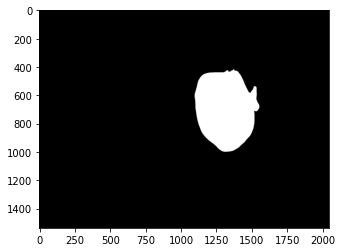

In [10]:
imageOperations.showImage('../input/groundtruths/inverted-masks/010543abfbd0db1e9aa1b24604336e0c.mask.png')

In [11]:
try:
    os.mkdir('../input/groundtruths/CASIA-2-Groundtruth2/')
except:
    print('folder created')

for file in tqdm(os.listdir('../input/groundtruths/casia-masks/')):
    img = cv2.imread('../input/groundtruths/casia-masks/' + file)
    name_arr = file.split('_')
    cv2.imwrite('../input/groundtruths/CASIA-2-Groundtruth2/' + name_arr[-2] + '_gt.png', img)

100%|██████████| 5123/5123 [00:18<00:00, 281.06it/s]


In [3]:
try:
    os.mkdir('../input/data-prep')
    os.mkdir('../input/data-prep/train')
    os.mkdir('../input/data-prep/train/pristine')
    os.mkdir('../input/data-prep/train/fake')
    os.mkdir('../input/data-prep/test')
    os.mkdir('../input/data-prep/test/pristine')
    os.mkdir('../input/data-prep/test/fake')
    os.mkdir('../input/data-prep/validation')
    os.mkdir('../input/data-prep/validation/pristine')
    os.mkdir('../input/data-prep/validation/fake')
except:
    print('folders already created')

In [16]:
try:
    os.mkdir('../input/patches')
    os.mkdir('../input/patches/train')
    os.mkdir('../input/patches/train/pristine')
    os.mkdir('../input/patches/train/fake')
    os.mkdir('../input/patches/test')
    os.mkdir('../input/patches/test/pristine')
    os.mkdir('../input/patches/test/fake')
    os.mkdir('../input/patches/validation')
    os.mkdir('../input/patches/validation/pristine')
    os.mkdir('../input/patches/validation/fake')
except:
    print('folders already created')

In [2]:
dataPrepare = DataPrep()

In [3]:
indexes, patch_arr = dataPrepare.ExtractPatches('../input/data/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif', '../input/groundtruths/CASIA-2-Groundtruth2/00138_gt.png')

In [5]:
indexes.shape

(500,)

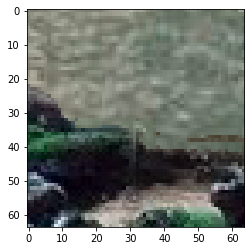

In [9]:
plt.imshow(patch_arr[450])
plt.show()

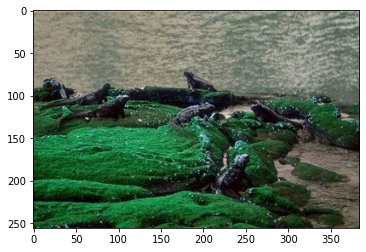

In [14]:
img = cv2.imread('../input/data/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif')
plt.imshow(img)
plt.show()

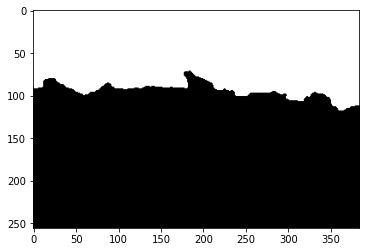

In [15]:
img = cv2.imread('../input/groundtruths/CASIA-2-Groundtruth2/00138_gt.png')
plt.imshow(img)
plt.show()

In [6]:
# split data
# dataPrepare# source directories
Pristine_SOURCE_DIR = "../input/data/dataset-dist/phase-01/training/pristine/"
Fake_SOURCE_DIR = "../input/data/dataset-dist/phase-01/training/fake/"
# pristine directories
TRAINING_PRISTINE_DIR = "../input/data-prep/train/pristine/"
TESTING_PRISTINE_DIR = "../input/data-prep/test/pristine/"
VALIDATION_PRISTINE_DIR = "../input/data-prep/validation/pristine/"
# fake directories
TRAINING_FAKE_DIR = "../input/data-prep/train/fake/"
TESTING_FAKE_DIR = "../input/data-prep/test/fake/"
VALIDATION_FAKE_DIR = "../input/data-prep/validation/fake/"

dataPrepare.splitData(Pristine_SOURCE_DIR, TRAINING_PRISTINE_DIR, TESTING_PRISTINE_DIR,VALIDATION_PRISTINE_DIR, 0.1, 0.2)
dataPrepare.splitData(Fake_SOURCE_DIR, TRAINING_FAKE_DIR, TESTING_FAKE_DIR, VALIDATION_FAKE_DIR, 0.1, 0.2)




735 210 105
*********Data splitting done************
315 90 45
*********Data splitting done************


In [7]:
Pristine_SOURCE_DIR = "../input/data/Au/"
Fake_SOURCE_DIR = "../input/data/Tp/"

dataPrepare.splitData(Pristine_SOURCE_DIR, TRAINING_PRISTINE_DIR, TESTING_PRISTINE_DIR,VALIDATION_PRISTINE_DIR, 0.1, 0.2)
dataPrepare.splitData(Fake_SOURCE_DIR, TRAINING_FAKE_DIR, TESTING_FAKE_DIR, VALIDATION_FAKE_DIR, 0.1, 0.2)


5243 1498 749
*********Data splitting done************
3586 1024 512
*********Data splitting done************


In [8]:
# creating train fake patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/train/fake/')):
    try:
        img_path = '../input/data-prep/train/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.ExtractPatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/train/fake/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file)

100%|██████████| 3901/3901 [1:25:41<00:00,  1.32s/it]  


In [9]:
# creating train fake patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/test/fake/')):
    try:
        img_path = '../input/data-prep/test/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.ExtractPatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/test/fake/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file)

100%|██████████| 1114/1114 [30:52<00:00,  1.66s/it] 


In [10]:
# creating train fake patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/validation/fake/')):
    try:
        img_path = '../input/data-prep/validation/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.ExtractPatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/validation/fake/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file)

100%|██████████| 558/558 [11:28<00:00,  1.23s/it]


In [12]:
# extracting trian pristine patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/train/fake/')):
    try:
        img_path = '../input/data-prep/train/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.extractPristinePatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/train/pristine/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file) 

  3%|▎         | 109/3901 [00:20<06:35,  9.59it/s]

could not broadcast input array from shape (58) into shape (64)
b0060704d02f1229b75cbd550c7267b4.png


  7%|▋         | 280/3901 [01:16<15:41,  3.84it/s]  

could not broadcast input array from shape (58) into shape (64)
ca472f184807aded538221ac0b5ac27b.png


 10%|█         | 399/3901 [01:50<09:21,  6.24it/s]  

could not broadcast input array from shape (0,64) into shape (64)
Tp_S_NNN_S_N_ind20037_ind20037_01778.tif


 19%|█▉        | 740/3901 [03:00<08:56,  5.89it/s]  

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_NRN_M_N_nat10134_nat10124_11913.jpg


 22%|██▏       | 865/3901 [03:20<09:40,  5.23it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_S_NND_S_N_sec20064_sec20064_01654.tif


 47%|████▋     | 1852/3901 [08:41<09:54,  3.45it/s]  

could not broadcast input array from shape (58) into shape (64)
cc263a4c9ff9943acbb9049f637a0bed.png


 70%|██████▉   | 2729/3901 [13:23<02:15,  8.67it/s]  

could not broadcast input array from shape (56) into shape (64)
Tp_S_CRN_S_N_art00059_art00059_10508.tif


 74%|███████▎  | 2871/3901 [13:58<02:16,  7.56it/s]

could not broadcast input array from shape (56) into shape (64)
Tp_D_CNN_M_N_sec00011_cha00085_11227.jpg


 77%|███████▋  | 3011/3901 [14:51<02:10,  6.79it/s]  

could not broadcast input array from shape (58) into shape (64)
d4aff0ad5f4f99fc6cad4243b926eda7.png


 82%|████████▏ | 3180/3901 [15:21<01:54,  6.28it/s]

could not broadcast input array from shape (58) into shape (64)
aa3b4f7caf9de8c1d6551c33045fb4c1.png


 99%|█████████▊| 3851/3901 [17:47<00:20,  2.40it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_CRN_S_N_ani10191_ani10190_12437.jpg
could not broadcast input array from shape (56) into shape (64)
Tp_D_CRN_S_N_nat10130_pla00049_11524.jpg


100%|██████████| 3901/3901 [18:08<00:00,  3.59it/s]


In [4]:
# extracting trian pristine patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/test/fake/')):
    try:
        img_path = '../input/data-prep/test/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.extractPristinePatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/test/pristine/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file) 

 11%|█         | 124/1114 [00:32<03:19,  4.96it/s]

could not broadcast input array from shape (62) into shape (64)
Tp_S_NRD_S_N_arc20079_arc20079_01719.tif


 22%|██▏       | 241/1114 [01:15<02:04,  7.00it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_NRN_M_N_nat10134_nat00095_11912.jpg


 43%|████▎     | 474/1114 [02:54<17:16,  1.62s/it]

could not broadcast input array from shape (63) into shape (64)
Tp_S_NNN_S_N_art20077_art20077_01883.tif


 50%|█████     | 562/1114 [03:12<01:04,  8.58it/s]

could not broadcast input array from shape (58) into shape (64)
bc04da26ab41ce92565dd3c686dae6c8.png


 54%|█████▎    | 597/1114 [03:20<01:48,  4.78it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_NND_M_B_nat20098_nat20073_01602.tif


 88%|████████▊ | 976/1114 [05:21<00:15,  8.74it/s]

could not broadcast input array from shape (58) into shape (64)
d9b9f5db7d29a3855cceef574145b595.png


 89%|████████▉ | 996/1114 [05:28<00:12,  9.47it/s]

could not broadcast input array from shape (56) into shape (64)
Tp_S_NNN_S_N_sec00012_sec00012_11230.jpg


100%|██████████| 1114/1114 [05:51<00:00,  3.17it/s]


In [5]:
# extracting trian pristine patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/validation/fake/')):
    try:
        img_path = '../input/data-prep/validation/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.extractPristinePatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/validation/pristine/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file) 

100%|██████████| 558/558 [02:47<00:00,  3.34it/s]
